In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.12.0
Keras version: 2.12.0


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


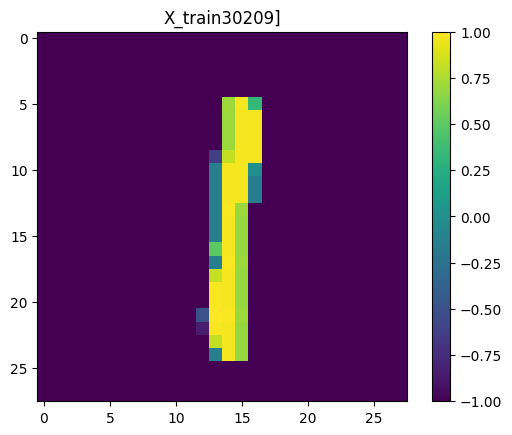

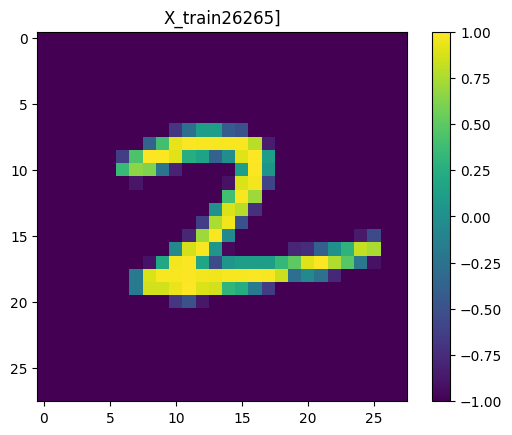

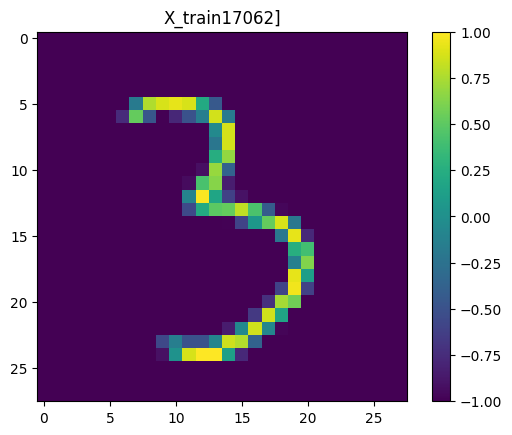

In [3]:
# Hyperparameters
latent_dim = 100
input_shape = (28, 28, 1)
# Load and preprocess dataset (MNIST for example)
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5

# Choose 5 random indices
random_indices = np.random.choice(train_images.shape[0], size=3, replace=False)
print(np.shape(train_images))
for idx in random_indices :
  plt.imshow(train_images[idx], cmap='viridis')  # Using the 'viridis' colormap
  plt.colorbar()  # Add a colorbar for reference
  plt.title(f'X_train{idx}]')
  plt.show()



In [4]:
# Generator model
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(784, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

generator = build_generator(latent_dim = latent_dim)
generator.build(np.shape(train_images))
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 114,064
Trainable params: 114,064
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Discriminator model
def build_discriminator(input_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

discriminator = build_discriminator(input_shape)
discriminator.build (input_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
discriminator.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [6]:
# GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model
#building the generative adversarial network GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.0002, beta_1=0.5))

gan.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         114064    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 100609    
                                                                 
Total params: 214,673
Trainable params: 114,064
Non-trainable params: 100,609
_________________________________________________________________


In [7]:
def plot_image (image_matrix) :
  # Plot the image as a matrix
  plt.imshow(image_matrix, cmap='viridis')
  plt.colorbar()  # Add a color bar for reference
  plt.title("Image as Matrix")
  plt.show()

In [ ]:
# Training loop
epochs = 10000
batch_size = 128

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, train_images.shape[0], batch_size)
    real_images = train_images[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    if epoch % 100 == 0:
        print(f"{epoch}Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
    if epoch % 100 == 0 :
      noise = np.random.normal(0, 1, (1, latent_dim))
      gen_img = generator(noise)
      plot_image(gen_img[0])

generator.save('generator_model.h5')

1/1 [==============================] - 0s 32ms/step


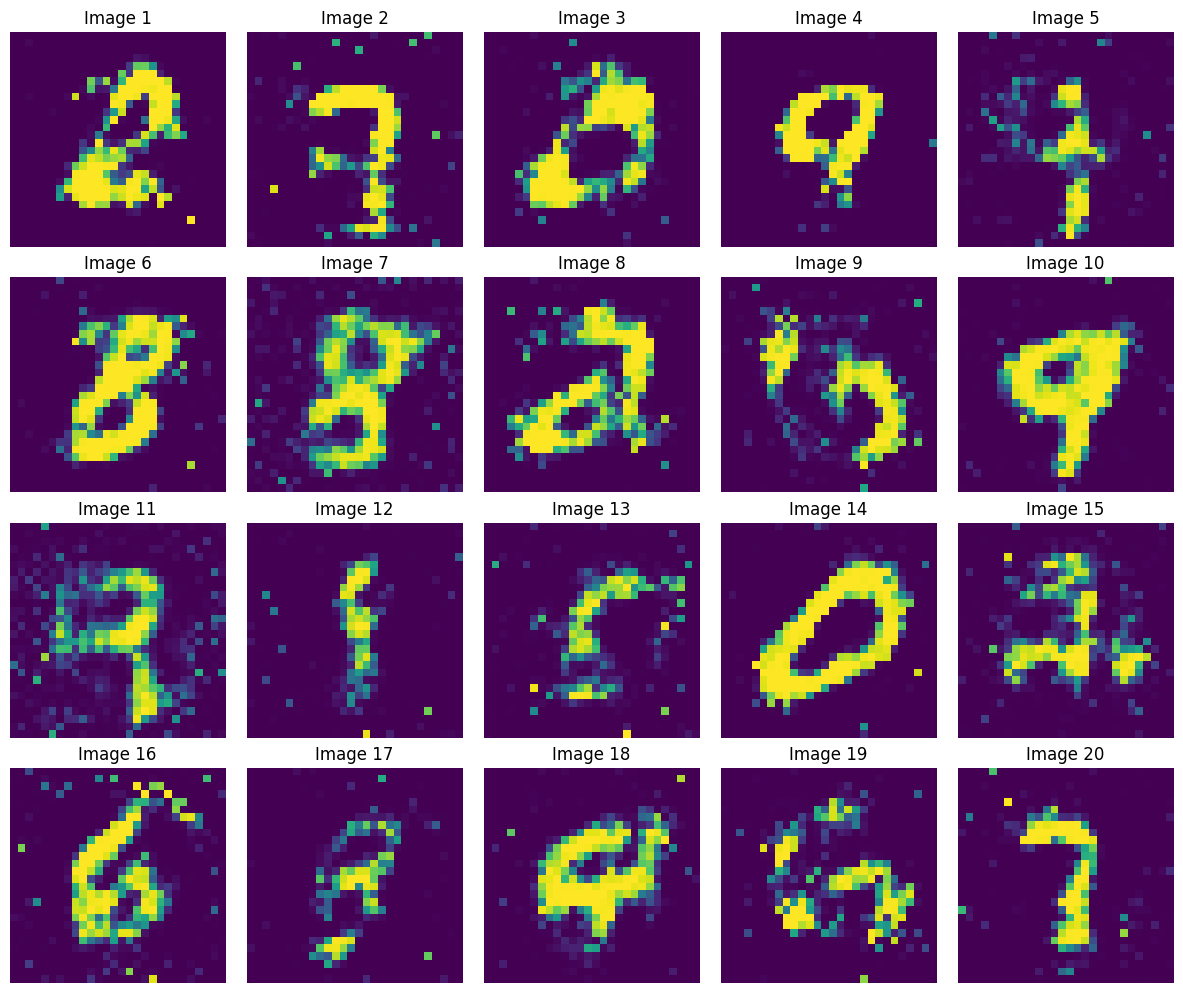

In [14]:
num_images = 20
image_size = (10, 10)
noise = np.random.normal(0, 1, (20, latent_dim))
fake_images = generator.predict(noise)

# Create a 4x5 grid for the matrix images
rows = 4
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(12, 10))

# Plot each image on its respective subplot
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(fake_images[i], cmap='viridis')
        ax.set_title(f'Image {i + 1}')
        ax.axis('off')
    else:
        ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Display the matrix images
plt.show()

